In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warning messages
import seaborn as sns
import datetime
from wordcloud import WordCloud
import plotly
from matplotlib import rcParams
import plotly.express as px
import plotly.figure_factory as ff
import re
import string
from collections import Counter
from nltk.corpus import stopwords

# Ensure the required stopwords dataset is available
import nltk
nltk.download('stopwords')

# Load the list of stopwords in English
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Reading the dataset containing US election 2020 data
election_data = pd.read_csv('us_election_2020.csv')

In [5]:
election_data.head(50)

,user,Subject,text
0,wheresestela1,Donald Trump,After the confrontation that cost Walter Wall...
1,TheFemaleYungin,Donald Trump,"""COVID-19 is still raging. Trump is still lyi..."
2,KathrynTomashu1,Donald Trump,"Donald Trump Jr.: ""Why aren't they talking ab..."
3,ajserino,Donald Trump,Let’s not forget who created these problems. T...
4,SpeakBravely,Donald Trump,There is no greater supporter of Donald Trump...
5,TMScarletFire,Donald Trump,'A vote for Donald Trump is a vote against the...
6,mwamsley5,Donald Trump,There is no greater supporter of Donald Trump...
7,SpeakBravely,Donald Trump,The same people who are outraged at AOC for s...
8,XchargerFan619,Donald Trump,Donald Trump is on track to become the worst ...
9,eachlifeinplace,Donald Trump,"It is Friday, October 30, 2020. One citizen, I..."


In [6]:
# Display the dimensions of the dataset (rows and columns)
print("Dataset Dimensions (Rows, Columns):", election_data.shape)

Dataset Dimensions (Rows, Columns): (10881, 3)


In [7]:
# Retrieve and display the first entry in the 'text' column
election_data['text'].iloc[0]

' After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved into rioting, looting and led to…'

<Axes: ylabel='count'>

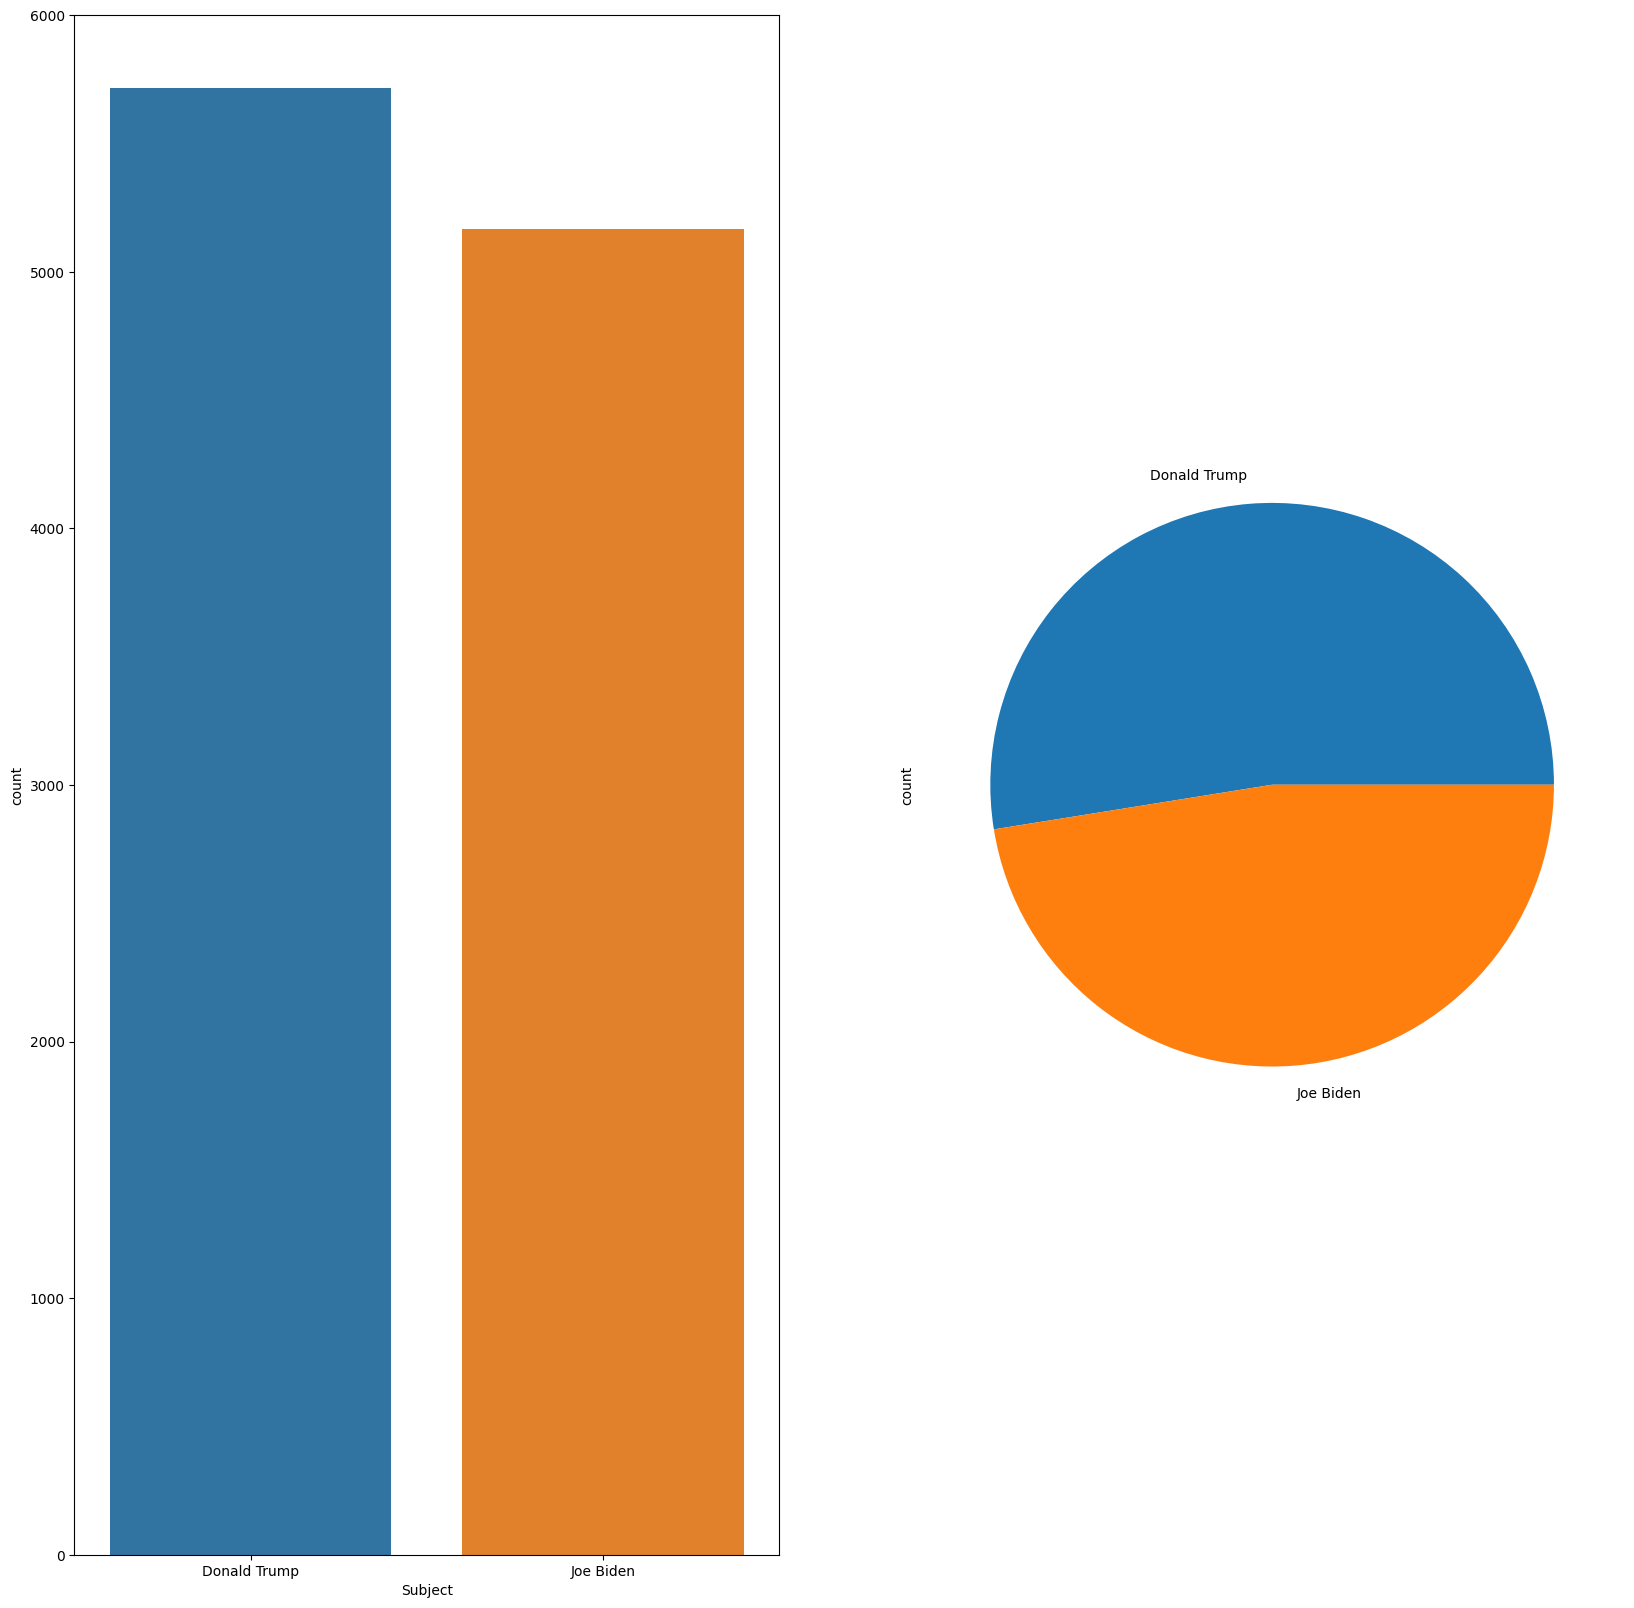

In [8]:
# Define figure size and initialize subplots
rcParams["figure.figsize"] = (20, 20)
fig, axes = plt.subplots(nrows=1, ncols=2)

# Create a count plot for the 'Subject' column
sns.countplot(x="Subject", hue="Subject", data=election_data, ax=axes[0])

# Generate a pie chart for the 'Subject' column
election_data['Subject'].value_counts().plot(kind='pie', ax=axes[1])

<Axes: xlabel='Subject', ylabel='Subject'>

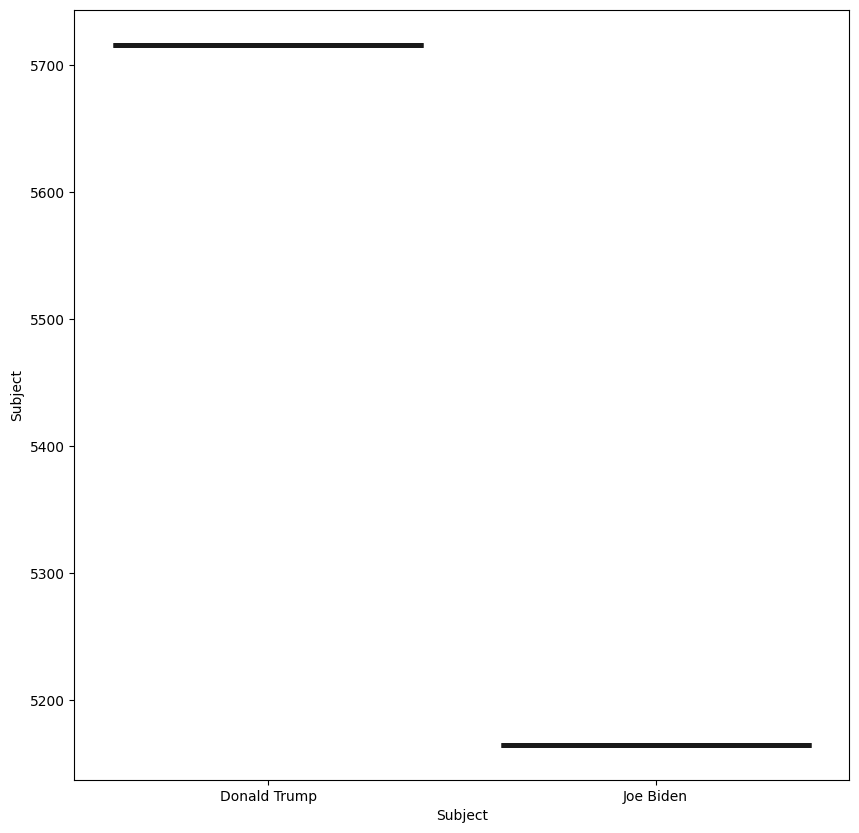

In [9]:
# Configure the figure size
rcParams["figure.figsize"] = (10, 10)

# Calculate the group size for each 'Subject'
subject_group_size = election_data.groupby('Subject')['Subject'].transform('size')

# Generate a boxplot
sns.boxplot(x='Subject', y=subject_group_size, data=election_data, hue='Subject', color='red', linewidth=3.5)

In [10]:
# Count the number of tweets posted by each user
user_tweet_count = election_data.groupby('user')['user'].value_counts()

In [11]:
# Display the number of unique users and the total number of rows in the dataset
print("Number of unique users who tweeted:", len(user_tweet_count))
print("Total number of rows in the dataset:", election_data.shape[0])

Number of unique users who tweeted: 9727
Total number of rows in the dataset: 10881


In [12]:
# Identify duplicate tweets in the dataset
duplicate_tweets = election_data[election_data.duplicated()]

<Axes: title={'center': 'Users with Duplicate Tweets'}, ylabel='count'>

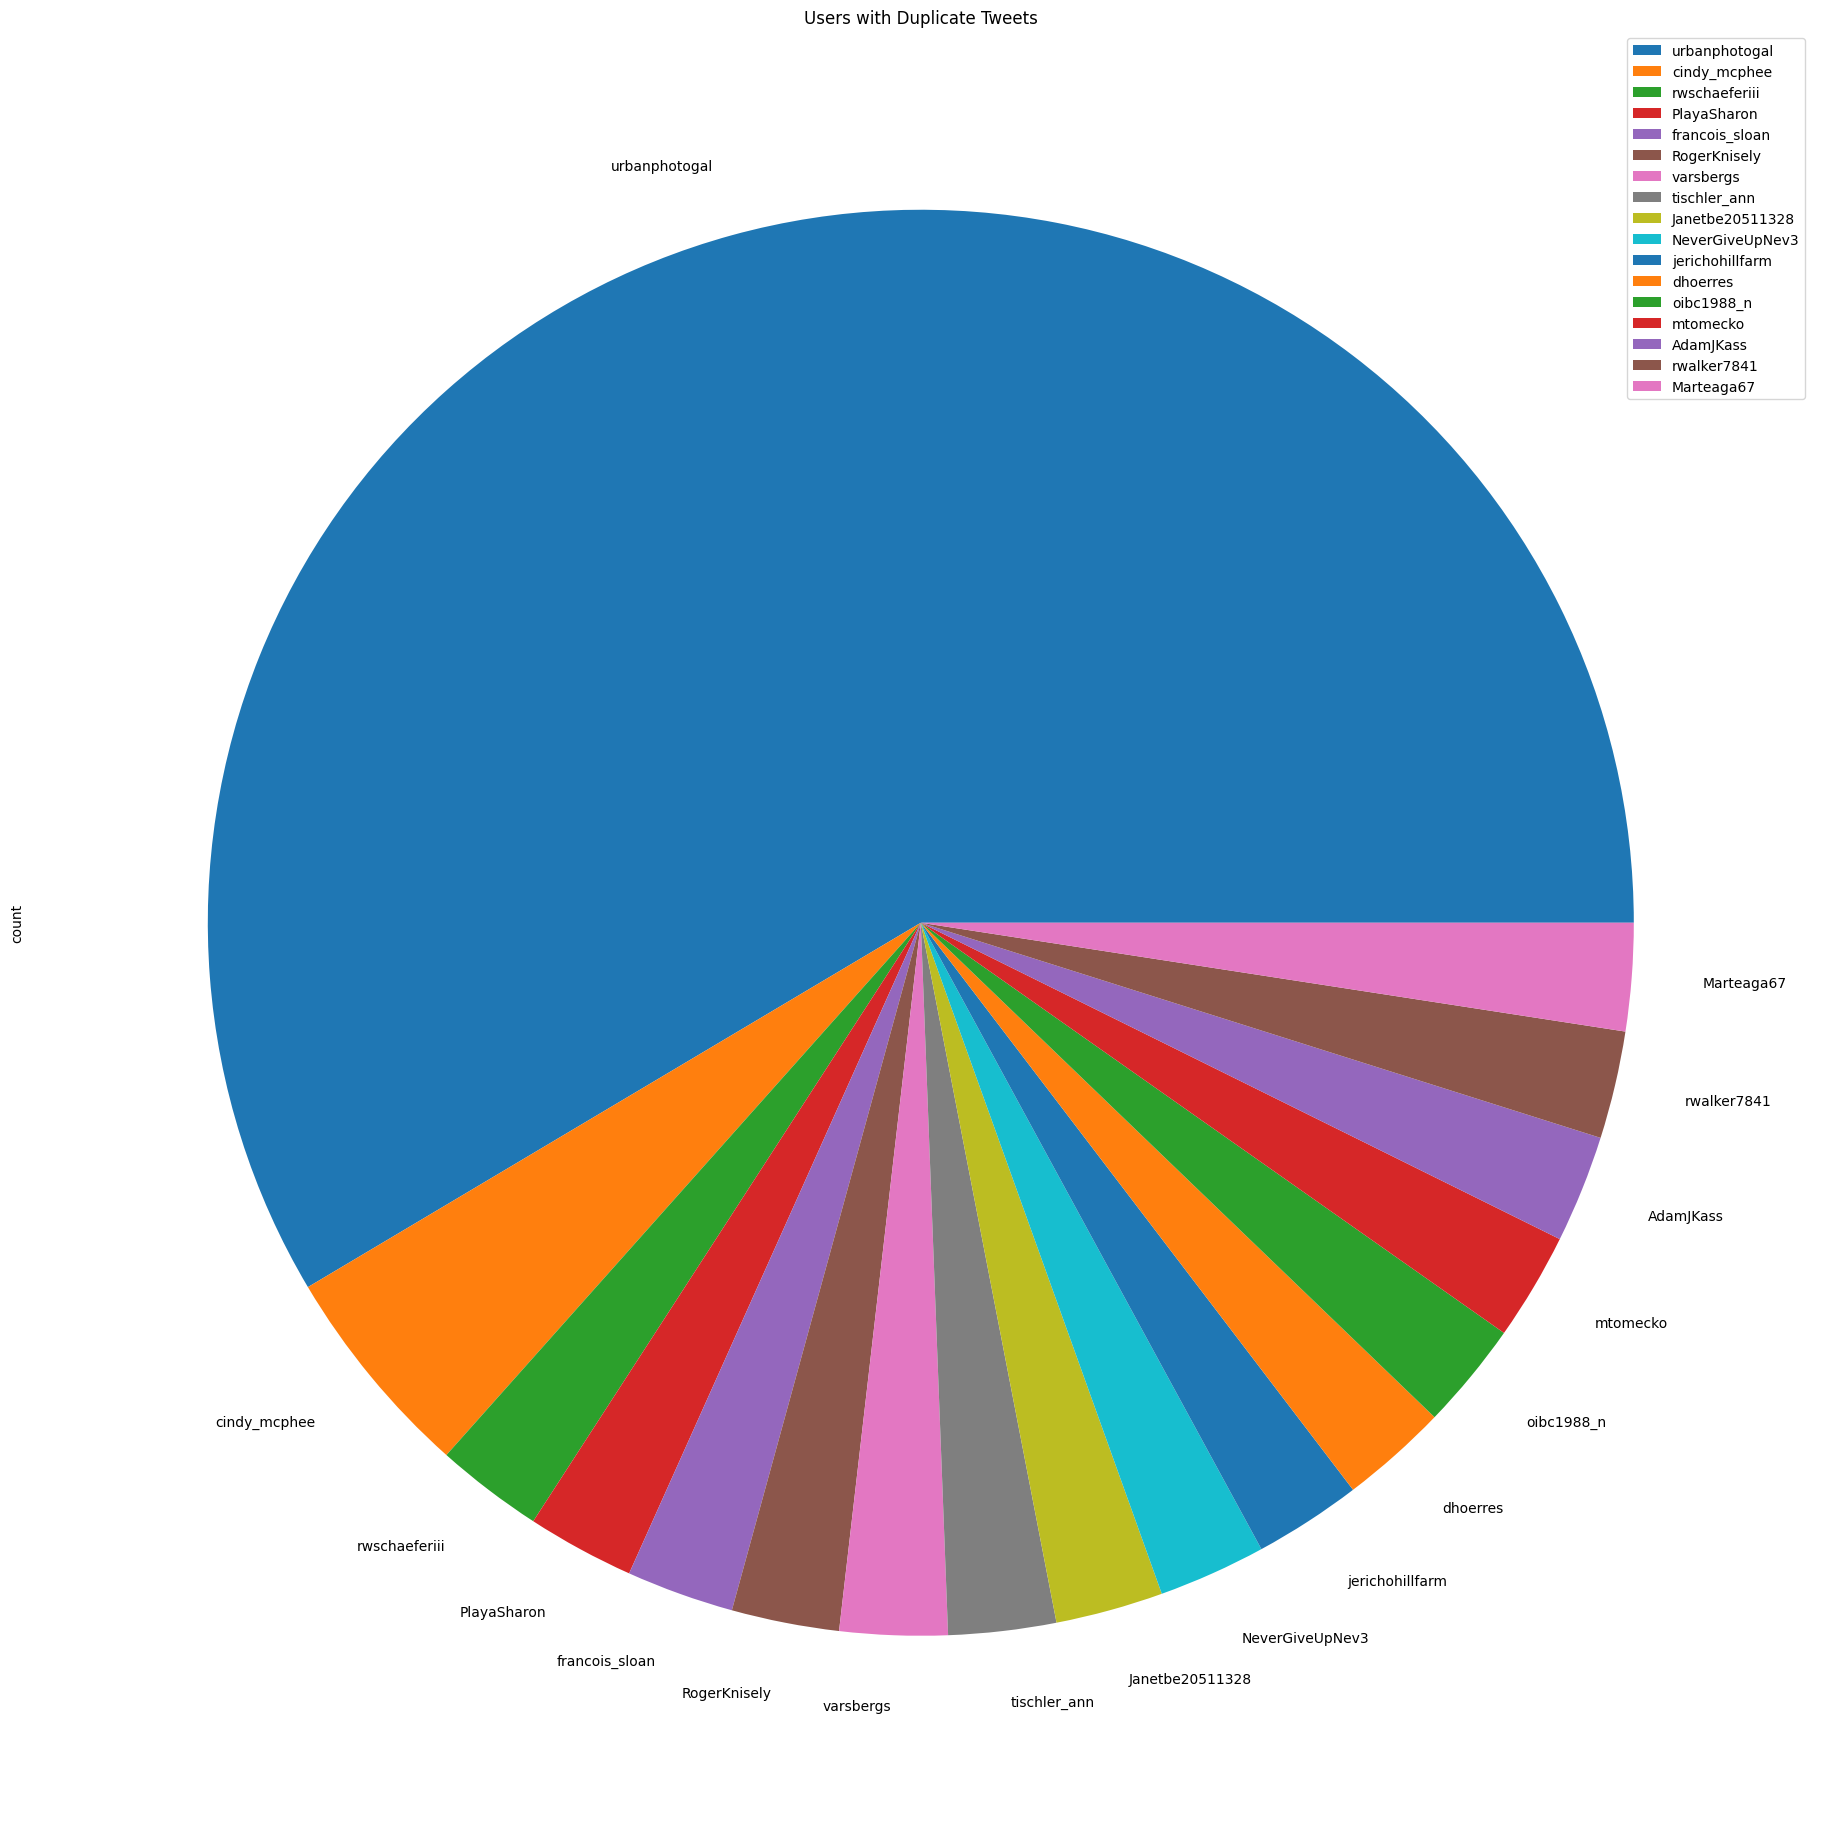

In [13]:
# Create a pie chart for users who have posted duplicate tweets
duplicate_tweets['user'].value_counts().plot(
    kind='pie',
    figsize=(23, 25),
    legend=True,
    title='Users with Duplicate Tweets'
)

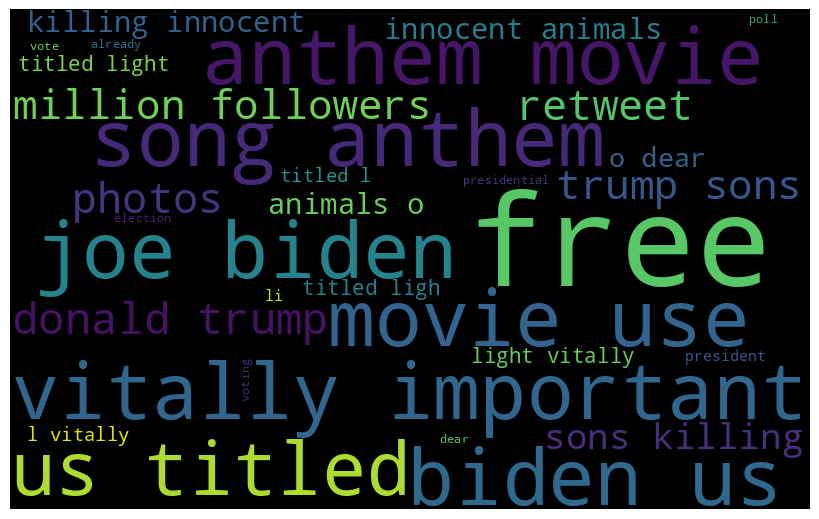

In [14]:
# Concatenate all words from duplicate tweets into a single string
tweet_text = ''
for text in duplicate_tweets['text']:
    text = str(text)
    words = text.split()
    words = [word.lower() for word in words]  # Convert each word to lowercase
    tweet_text += " ".join(words) + " "

# Generate a word cloud from the collected text
wordcloud = WordCloud(width=800, height=500, background_color='black', min_font_size=10).generate(tweet_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
# Filter tweets mentioning Donald Trump and Joe Biden
trump_tweets = election_data[election_data['Subject'] == 'Donald Trump']
biden_tweets = election_data[election_data['Subject'] == 'Joe Biden']

In [16]:
# Display the first few rows of tweets related to Donald Trump
trump_tweets.head()

,user,Subject,text
0,wheresestela1,Donald Trump,After the confrontation that cost Walter Wall...
1,TheFemaleYungin,Donald Trump,"""COVID-19 is still raging. Trump is still lyi..."
2,KathrynTomashu1,Donald Trump,"Donald Trump Jr.: ""Why aren't they talking ab..."
3,ajserino,Donald Trump,Let’s not forget who created these problems. T...
4,SpeakBravely,Donald Trump,There is no greater supporter of Donald Trump...


In [17]:
# Display the first few rows of tweets related to Joe Biden
biden_tweets.head()

,user,Subject,text
2928,gmollo1115,Joe Biden,Unfortunately she along with other politicia...
2929,mcritter61,Joe Biden,Let’s talk about the Hunter laptop and such. ...
2930,1kingsbay,Joe Biden,Fun to think about how we learned today that ...
2931,JanedgeJanis,Joe Biden,Larry Kudlow: Joe Biden's economic plan would...
2932,denopotter,Joe Biden,A 64-page document asserting an elaborate con...


In [18]:
# Define a function to clean text data
def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove content within square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

In [19]:
# Clean the 'text' column in Trump and Biden tweets using the clean_text function
trump_tweets['final_text'] = trump_tweets['text'].apply(clean_text)
biden_tweets['final_text'] = biden_tweets['text'].apply(clean_text)

In [20]:
# Define a function to filter out stopwords from a given list of words
def remove_stopwords(words):
    return [word for word in words if word not in stopwords_list]

In [21]:
# Tokenize and clean Trump tweets to identify common words
trump_tweets['tokenized_text'] = trump_tweets['final_text'].apply(lambda text: str(text).split())
trump_tweets['filtered_text'] = trump_tweets['tokenized_text'].apply(remove_stopwords)

# Count the frequency of each word across all tokenized and filtered tweets
word_counts = Counter([word for words in trump_tweets['filtered_text'] for word in words])

# Create a DataFrame for the top 20 most common words
common_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Common_words', 'count'])

# Display the DataFrame with a gradient background
common_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,donald,2134
1,realdonaldtrump,1944
2,trump,1885
3,biden,530
4,president,503
5,behind,361
6,trumps,357
7,foxnews,321
8,hunter,302
9,oh,282


In [22]:
from collections import Counter
import plotly.express as px

# Count the most frequent words in the 'clean_text' column of Trump tweets
word_frequencies = Counter([word for words in trump_tweets['filtered_text'] for word in words])

# Create a DataFrame with the top 20 most frequent words
common_words_df = pd.DataFrame(word_frequencies.most_common(20), columns=['Common_words', 'count'])

# Generate a horizontal bar chart with customized colors and design
fig = px.bar(
    common_words_df,
    x="count",
    y="Common_words",
    title="Most Common Words in Donald Trump Tweets",
    orientation='h',
    width=700,
    height=500,
    color='Common_words',  # Apply color differentiation to the words
    color_discrete_sequence=px.colors.qualitative.Pastel  # Use a pastel color palette
)

# Enhance the layout for better visual appeal
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # Arrange bars in ascending order of count
    showlegend=False,  # Remove legend for a streamlined appearance
    title_x=0.5  # Center the chart title
)

fig.show()

In [23]:
# Create a treemap visualization for the most common words in Donald Trump tweets
fig = px.treemap(
    common_words_df,
    path=['Common_words'],
    values='count',
    title='Treemap of Most Common Words in Donald Trump Tweets'
)
fig.show()

In [24]:
# Tokenize and clean Biden tweets to extract common words
biden_tweets['tokenized_text'] = biden_tweets['final_text'].apply(lambda text: str(text).split())
biden_tweets['filtered_text'] = biden_tweets['tokenized_text'].apply(remove_stopwords)

# Count the frequency of words in the cleaned text
word_counts_biden = Counter([word for words in biden_tweets['filtered_text'] for word in words])

# Create a DataFrame for the top 20 most frequent words
common_words_biden_df = pd.DataFrame(word_counts_biden.most_common(20), columns=['Common_words', 'count'])

# Display the DataFrame with a gradient background
common_words_biden_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,joebiden,2592
1,joe,2044
2,biden,1994
3,trump,620
4,barackobama,537
5,president,510
6,vote,305
7,need,299
8,hunter,296
9,people,281


In [26]:
# Assuming `common_words_biden_df` contains the top 20 words in Biden tweets
fig = px.bar(
    common_words_biden_df,
    x="count",
    y="Common_words",
    title="Most Common Words in Joe Biden Tweets",
    orientation='h',
    width=700,
    height=500,
    color='Common_words',  # Assign unique colors for each word
    color_discrete_sequence=px.colors.qualitative.Pastel  # Apply a pastel color palette
)

# Enhance the chart layout for better visual appeal
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # Arrange bars from highest to lowest frequency
    showlegend=False,  # Hide legend for simplicity
    title_x=0.5  # Align the title to the center
)

fig.show()

In [27]:
# Create a treemap visualization for the most common words in Joe Biden tweets
fig = px.treemap(
    common_words_biden_df,
    path=['Common_words'],
    values='count',
    title='Treemap of Most Common Words in Joe Biden Tweets'
)
fig.show()

In [28]:
# View the first few rows of the dataset containing Trump tweets
trump_tweets.head()

,user,Subject,text,final_text,tokenized_text,filtered_text
0,wheresestela1,Donald Trump,After the confrontation that cost Walter Wall...,after the confrontation that cost walter wall...,"[after, the, confrontation, that, cost, walter...","[confrontation, cost, walter, wallace, jr, lif..."
1,TheFemaleYungin,Donald Trump,"""COVID-19 is still raging. Trump is still lyi...",is still raging trump is still lying,"[is, still, raging, trump, is, still, lying]","[still, raging, trump, still, lying]"
2,KathrynTomashu1,Donald Trump,"Donald Trump Jr.: ""Why aren't they talking ab...",donald trump jr why arent they talking about ...,"[donald, trump, jr, why, arent, they, talking,...","[donald, trump, jr, arent, talking, deaths, oh..."
3,ajserino,Donald Trump,Let’s not forget who created these problems. T...,let’s not forget who created these problems te...,"[let’s, not, forget, who, created, these, prob...","[let’s, forget, created, problems, tell, donal..."
4,SpeakBravely,Donald Trump,There is no greater supporter of Donald Trump...,there is no greater supporter of donald trump...,"[there, is, no, greater, supporter, of, donald...","[greater, supporter, donald, trump, world, mar..."


In [29]:
# View the first few rows of the dataset containing Biden tweets
biden_tweets.head()

,user,Subject,text,final_text,tokenized_text,filtered_text
2928,gmollo1115,Joe Biden,Unfortunately she along with other politicia...,unfortunately she along with other politicia...,"[unfortunately, she, along, with, other, polit...","[unfortunately, along, politicians, never, rec..."
2929,mcritter61,Joe Biden,Let’s talk about the Hunter laptop and such. ...,let’s talk about the hunter laptop and such o...,"[let’s, talk, about, the, hunter, laptop, and,...","[let’s, talk, hunter, laptop, oh, wait, biden,..."
2930,1kingsbay,Joe Biden,Fun to think about how we learned today that ...,fun to think about how we learned today that ...,"[fun, to, think, about, how, we, learned, toda...","[fun, think, learned, today, trump, barr, turk..."
2931,JanedgeJanis,Joe Biden,Larry Kudlow: Joe Biden's economic plan would...,larry kudlow joe bidens economic plan would c...,"[larry, kudlow, joe, bidens, economic, plan, w...","[larry, kudlow, joe, bidens, economic, plan, w..."
2932,denopotter,Joe Biden,A 64-page document asserting an elaborate con...,a document asserting an elaborate conspiracy...,"[a, document, asserting, an, elaborate, conspi...","[document, asserting, elaborate, conspiracy, t..."


In [30]:
from textblob import TextBlob
from textblob import Word

# Lists to categorize words based on sentiment polarity
positive_words = []
negative_words = []
neutral_words = []

# Assess polarity of words in the 'final_text' column of Trump tweets
for text in trump_tweets['final_text']:
    words = text.split()
    for word in words:
        blob = TextBlob(word)
        polarity = blob.polarity
        if polarity > 0.0:
            positive_words.append(word)
        elif polarity < 0.0:
            negative_words.append(word)
        else:
            neutral_words.append(word)

In [31]:
# Display the count of positive and negative words in Donald Trump tweets
print("Number of Positive Words in Donald Trump Tweets:", len(positive_words))
print("Number of Negative Words in Donald Trump Tweets:", len(negative_words))

Number of Positive Words in Donald Trump Tweets: 2871
Number of Negative Words in Donald Trump Tweets: 2084


In [32]:
# Create a funnel chart to visualize the positive words in Donald Trump tweets
fig = px.funnel(
    x=pd.Series(positive_words).value_counts().values,
    y=pd.Series(positive_words).value_counts().index,
    color=pd.Series(positive_words).value_counts().index,
    orientation='h',
    title='Funnel Chart of Positive Words in Donald Trump Tweets'
)
fig.show()

In [33]:
# Create a funnel chart to visualize the negative words in Donald Trump tweets
fig = px.funnel(
    x=pd.Series(negative_words).value_counts().values,
    y=pd.Series(negative_words).value_counts().index,
    color=pd.Series(negative_words).value_counts().index,
    orientation='h',
    title='Funnel Chart of Negative Words in Donald Trump Tweets'
)
fig.show()

In [34]:
from textblob import TextBlob
from textblob import Word

# Lists to categorize words based on sentiment polarity in Biden tweets
positive_words_biden = []
negative_words_biden = []
neutral_words_biden = []

# Assess polarity of words in the 'final_text' column of Biden tweets
for text in biden_tweets['final_text']:
    words = text.split()
    for word in words:
        blob = TextBlob(word)
        polarity = blob.polarity
        if polarity > 0.0:
            positive_words_biden.append(word)
        elif polarity < 0.0:
            negative_words_biden.append(word)
        else:
            neutral_words_biden.append(word)

In [35]:
# Display the count of positive and negative words in Joe Biden tweets
print("Number of Positive Words in Joe Biden Tweets:", len(positive_words_biden))
print("Number of Negative Words in Joe Biden Tweets:", len(negative_words_biden))

Number of Positive Words in Joe Biden Tweets: 2600
Number of Negative Words in Joe Biden Tweets: 1711


In [36]:
# Create a density contour plot for positive words in Joe Biden tweets
fig = px.density_contour(
    x=pd.Series(positive_words_biden).value_counts().index,
    y=pd.Series(positive_words_biden).value_counts().values,
    title='Density Contour of Positive Words in Joe Biden Tweets'
)

fig.update_layout(
    xaxis_title="Positive Words",
    yaxis_title="Frequency",
    showlegend=False
)

fig.show()

In [40]:
fig = px.scatter_polar(
    negative_words_biden,
    r=pd.Series(negative_words_biden),
    theta=pd.Series(negative_words_biden),
    color=pd.Series(negative_words_biden),
    title='Negative words in Joe Biden tweets',
    width=1000,
    height=900,
    opacity=1
)
fig.show()

In [41]:
# Remove duplicate rows from the dataset
election_data = election_data.drop_duplicates()

In [42]:
# Define a function to clean input text data
def clean_text(input_text):
    step1 = re.sub(r"[?|$|(|)|,|@@|=|<|!|]|Å&*]", r'', input_text)  # Remove specific special characters
    step2 = re.sub(r"[^a-zA-Z]", r' ', step1)  # Replace non-alphabetic characters with a space
    step3 = step2.lower()  # Convert the text to lowercase
    step4 = re.sub(r"\b\w{1,2}\b", r' ', step3)  # Remove short words with 1 or 2 characters
    step5 = re.sub(r"https?://\S+|www\.\S+", r' ', step4)  # Remove URLs
    step6 = re.sub(r' +', r' ', step5)  # Replace multiple spaces with a single space
    return step6

In [43]:
# Apply the cleaning function to the 'text' column and create a new column for cleaned tweets
election_data['clean_tweets'] = election_data['text'].apply(clean_text)

In [44]:
# Function to perform sentiment analysis on cleaned tweets
def sentiment_analysis(df):
    from textblob import TextBlob
    sentiment_scores = []

    for tweet in df['clean_tweets']:
        polarity = TextBlob(tweet).sentiment.polarity  # Calculate polarity using TextBlob
        sentiment_scores.append(polarity)

    df['textblob_sentiment'] = sentiment_scores  # Add a new column with sentiment scores
    return df

In [45]:
# Apply the sentiment analysis function to the Election DataFrame
election_data = sentiment_analysis(election_data)

In [46]:
# Display a concise summary of the DataFrame
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10880
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user                10840 non-null  object 
 1   Subject             10840 non-null  object 
 2   text                10840 non-null  object 
 3   clean_tweets        10840 non-null  object 
 4   textblob_sentiment  10840 non-null  float64
dtypes: float64(1), object(4)
memory usage: 508.1+ KB


In [47]:
# Function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0.0:
        return 'Positive'
    elif polarity < 0.0:
        return 'Negative'
    else:
        return 'Neutral'

In [48]:
# Apply the classify_sentiment function to the 'Textblob_sentiment' column to categorize sentiments
election_data['Sentiment'] = election_data['textblob_sentiment'].apply(classify_sentiment)

In [49]:
# Count the occurrences of each sentiment category
election_data['Sentiment'].value_counts()

,count
Sentiment,
Neutral,4899
Positive,3498
Negative,2443


In [50]:
# Filter the dataset for tweets related to Donald Trump and Joe Biden
trump_data = election_data[election_data['Subject'] == 'Donald Trump']
biden_data = election_data[election_data['Subject'] == 'Joe Biden']

In [52]:
# Count the occurrences of each sentiment category in Donald Trump tweets
trump_data['Sentiment'].value_counts()

,count
Sentiment,
Neutral,2558
Positive,1719
Negative,1422


In [53]:
# Count the occurrences of each sentiment category in Joe Biden tweets
biden_data['Sentiment'].value_counts()

,count
Sentiment,
Neutral,2341
Positive,1779
Negative,1021


In [54]:
# Pie chart for Donald Trump's sentiments
fig_trump = px.pie(
    names=trump_data['Sentiment'].value_counts().index,
    values=trump_data['Sentiment'].value_counts().values,
    title="Overall Sentiments of Donald Trump's Tweets",
    hole=0.5,
    color=trump_data['Sentiment'].value_counts().index,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_trump.update_traces(textinfo='percent+label')
fig_trump.show()

# Pie chart for Joe Biden's sentiments
fig_biden = px.pie(
    names=biden_data['Sentiment'].value_counts().index,
    values=biden_data['Sentiment'].value_counts().values,
    title="Overall Sentiments of Joe Biden's Tweets",
    hole=0.5,
    color=biden_data['Sentiment'].value_counts().index,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_biden.update_traces(textinfo='percent+label')
fig_biden.show()

In [55]:
# Create a violin plot comparing sentiments for Joe Biden and Donald Trump
fig = px.violin(
    election_data,
    x='Sentiment',
    y='Subject',
    color='Sentiment',
    hover_data=['Sentiment'],  # Adjusted to show sentiment in hover data
    violinmode='overlay',
    box=True,
    orientation='v',
    title='Sentiment Distribution: Joe Biden vs Donald Trump'
)

fig.show()